In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gp




In [2]:
map = gp.read_file('vnm_polbnda_adm1_2014_pdc.shp')

In [3]:
map

,OBJECTID,ADM1_CODE,ADM1_NAME,Shape_Leng,Shape_Area,ADM0,geometry
0,1,101.0,TP. Ha Noi,4.454528,0.292565,0,"(POLYGON ((105.606872765 20.83819124300004, 10..."
1,2,103.0,Hai Phong,7.707115,0.116245,0,(POLYGON ((107.7422091400001 20.14579437300006...
2,3,104.0,Vinh Phuc,1.883219,0.107479,0,"POLYGON ((105.5474599520001 21.57311358900006,..."
3,4,106.0,Bac Ninh,1.677155,0.071409,0,(POLYGON ((106.1148495840001 20.98285002900008...
4,5,107.0,Hai Duong,2.917415,0.144868,0,"POLYGON ((106.5002178710001 21.05731950900008,..."
5,6,109.0,Hung Yen,1.729819,0.080632,0,"(POLYGON ((106.123463816 20.61580925800007, 10..."
6,7,111.0,Ha Nam,1.737337,0.074659,0,"POLYGON ((106.004323938 20.70438255500005, 106..."
7,8,113.0,Nam Dinh,3.334182,0.137180,0,(POLYGON ((106.5752997160001 20.20015787200009...
8,9,115.0,Thai Binh,2.925789,0.136854,0,(POLYGON ((106.5957148150001 20.29840127300008...
9,10,117.0,Ninh Binh,2.496099,0.116352,0,"(POLYGON ((106.089400003 19.93875471800004, 10..."


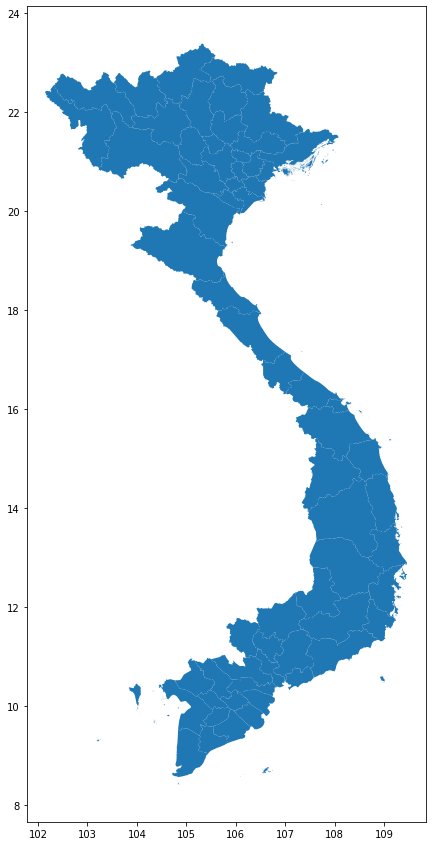

In [4]:
fig,ax=plt.subplots(figsize=(15,15))
map.plot(ax=ax)

In [5]:
def clean_province (province):
    try:        
        if 'TP.' in province:
            return province[4:]
        else:
            return province
    except:
        return 'NA'

In [6]:
map['ADM1_NAME']=map.apply(lambda row: clean_province(str(row['ADM1_NAME'])),axis=1)

In [7]:
df=pd.read_csv('region-cpa-data2.csv')

In [8]:
df.iloc[0,1]

34851

In [9]:
merged=map.set_index('ADM1_NAME').join(df.set_index('region'))
merged=merged.fillna(0)

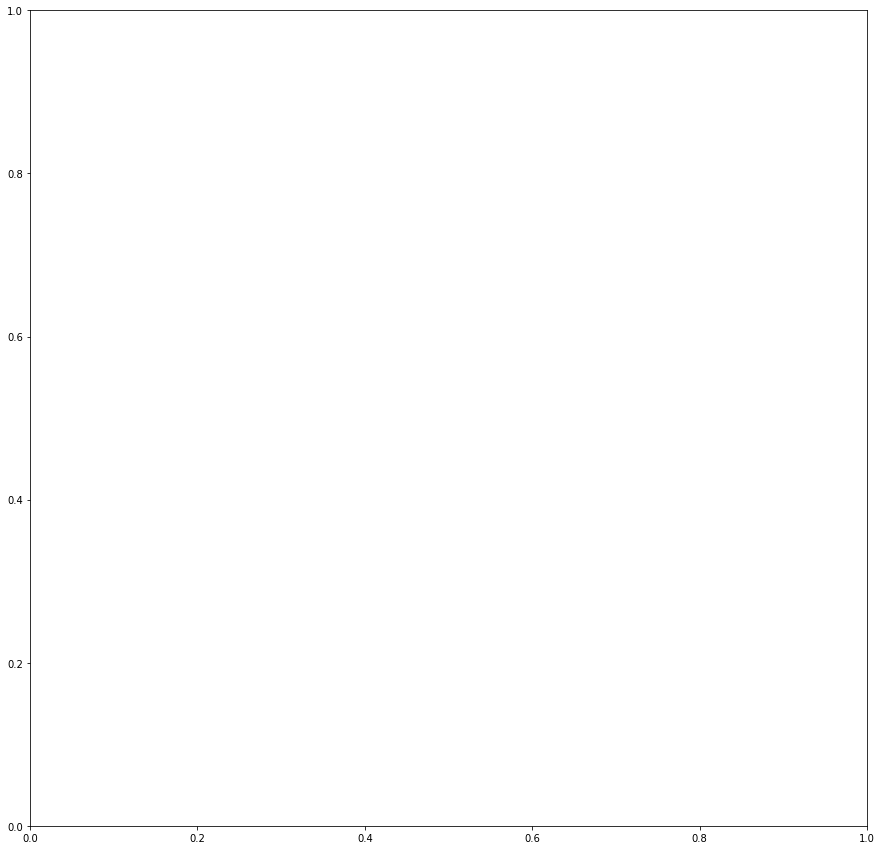

In [10]:
variable = 'cppi'
vmin, vmax = 0.5, 8
fig, ax = plt.subplots(1,figsize=(15,15))

In [11]:
merged.plot(column=variable, cmap='Reds', scheme='fisher_jenks',linewidth=0.8, ax=ax, edgecolor='0.8')

<Figure size 432x288 with 0 Axes>

In [12]:
# remove the axis
ax.axis('off')

# add a title
ax.set_title('CPPI by Region', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: Last 30 days',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

In [13]:
fig.savefig('testmap.png', dpi=300)

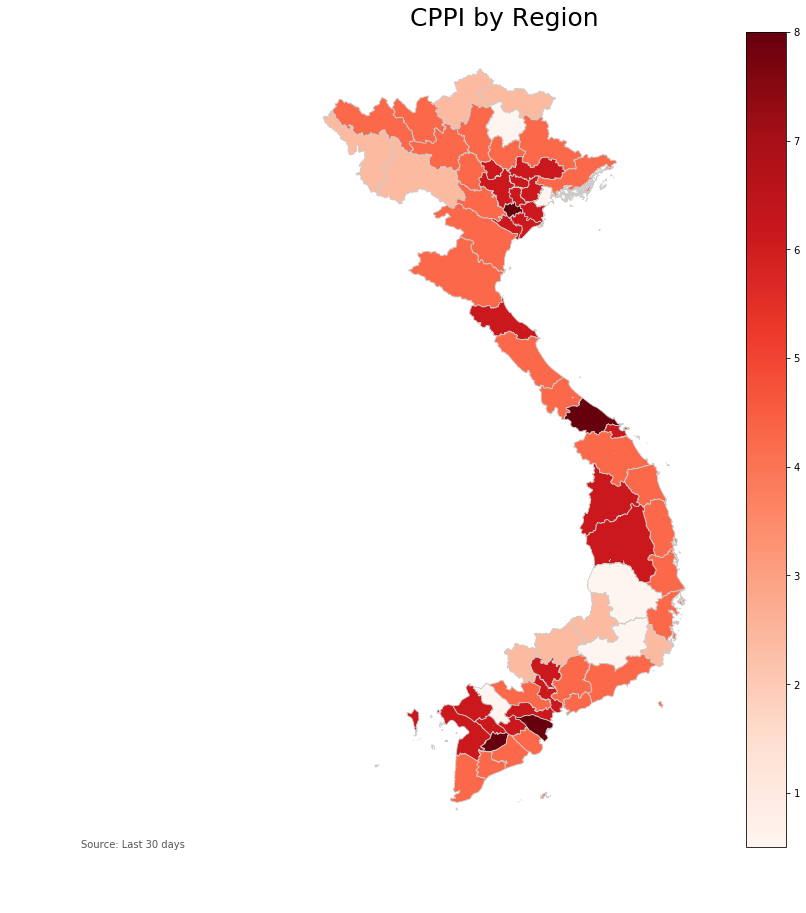

In [14]:
fig

PI Chart

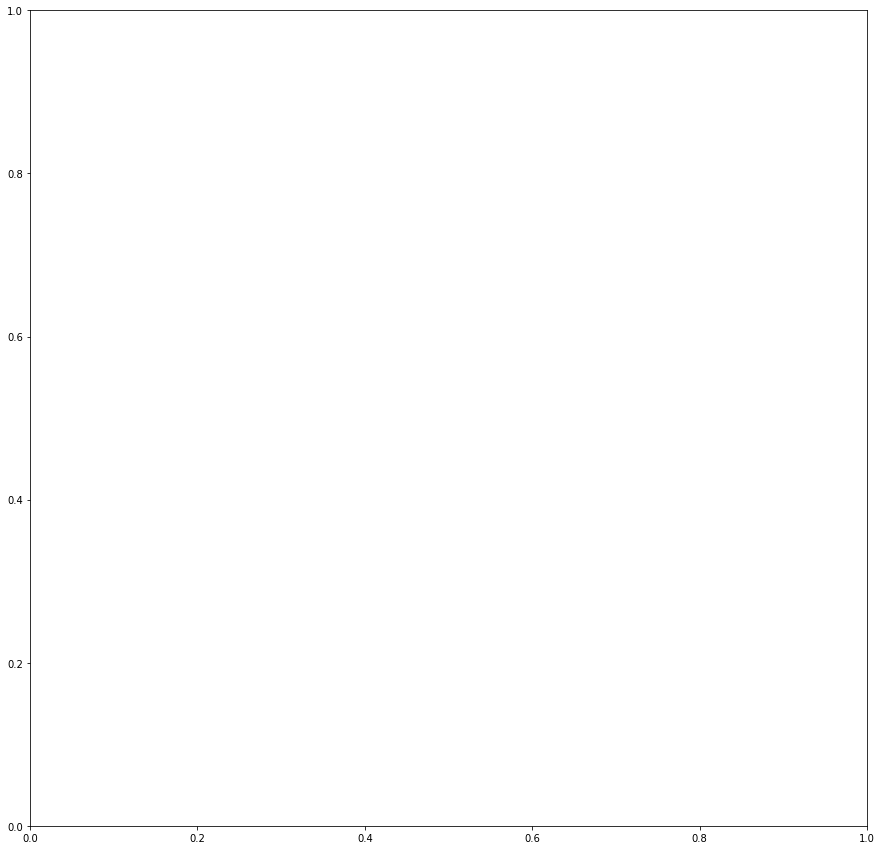

In [26]:
variable = 'pi'
vmin, vmax = 0, 260
fig, ax = plt.subplots(1,figsize=(15,15))

In [27]:
merged.plot(column=variable, cmap='Blues',scheme='quantiles', linewidth=0.8, ax=ax, edgecolor='0.8')

<Figure size 432x288 with 0 Axes>

In [28]:
# remove the axis
ax.axis('off')

# add a title
ax.set_title('PI by Region', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: Last 30 days',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

In [29]:
fig.savefig('pi.png', dpi=300)

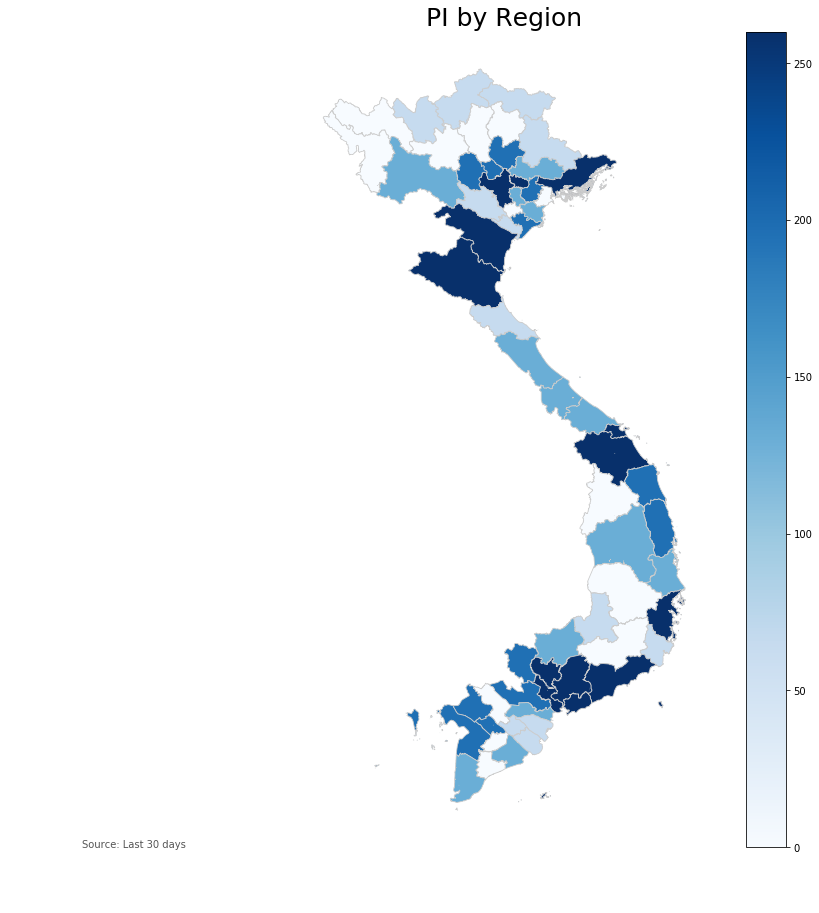

In [30]:
fig

Cost Chart

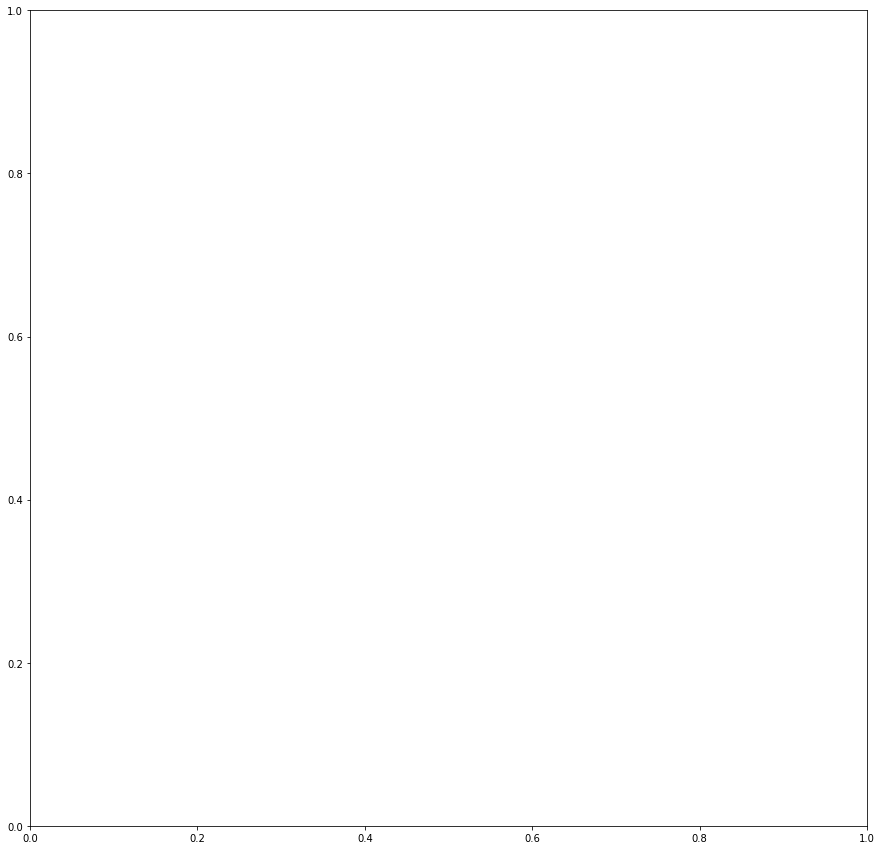

In [31]:
variable = 'cost'
vmin, vmax = 0, 235
fig, ax = plt.subplots(1,figsize=(15,15))

In [32]:
merged.plot(column=variable, cmap='Blues',scheme='quantiles',linewidth=0.8, ax=ax, edgecolor='0.8')

<Figure size 432x288 with 0 Axes>

In [33]:
# remove the axis
ax.axis('off')

# add a title
ax.set_title('Cost by Region', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: Last 30 days',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

In [34]:
fig.savefig('cost.png', dpi=300)

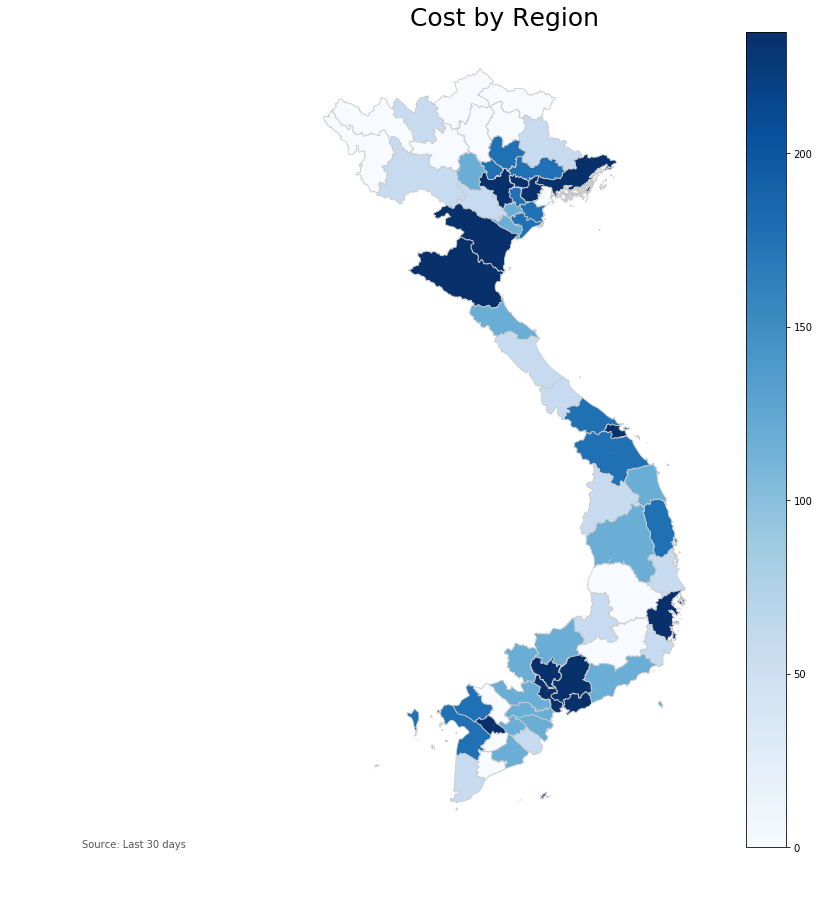

In [35]:
fig

In [36]:
merged.iloc[0]

OBJECTID                                                      1
ADM1_CODE                                                   101
Shape_Leng                                              4.45453
Shape_Area                                             0.292565
ADM0                                                          0
geometry      (POLYGON ((105.606872765 20.83819124300004, 10...
cost                                                      26967
pi                                                      4910.98
cppi                                                    5.49121
Name: Ha Noi, dtype: object

-increase look-back window for the raw data
-check which 'scheme' tells the most appropriate narrative
-apply spend thresholds for cppi graph